# Red neuronal Matemática 3

In [66]:
#Datos sacados de https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Administrator/Desktop/Matematica3/mate3-red/acv.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [67]:
print(df.isnull().sum()) #Chequeo presencia de valores nulos

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [68]:
gender_rep = { #Género
    "Female": 0,
    "Male": 1,
    "Other": 2, 
}

ever_married_rep = { #Alguna vez estuvo casado
    "No": 0,
    "Yes": 1,
}

work_type_rep =  { # Tipo de trabajo
    "Private": 0,
    "Self-employed": 1,
    "children": 2,
    "Never_worked": 3,
}

Residence_type_rep = { # Tipo de residencia
    "Urban": 0,
    "Rural": 1,
}

smoking_status_rep = { #Estatus como fumador
    "Unknown": 0,
    "never smoked": 1,
    "formerly smoked": 2,
    "smokes": 3,
}



In [69]:
df['gender'] = df['gender'].map(gender_rep)
df['ever_married'] = df['ever_married'].map(ever_married_rep)
df['work_type'] = df['work_type'].map(work_type_rep)
df['Residence_type'] = df['Residence_type'].map(Residence_type_rep)
df['smoking_status'] = df['smoking_status'].map(smoking_status_rep)

#Asignamos los valores numéricos a las columnas correspondientes.

In [70]:
df.dropna(axis=0, inplace=True) #Elimino los NaN
df.drop("id", axis=1, inplace=True) #Elimíno columna id

In [71]:
print(df.head()) #Visualizo el dataframe con los nuevos valores
print(df.isnull().sum()) #Verifico valores nulos

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1        0.0   
2       1  80.0             0              1             1        0.0   
3       0  49.0             0              0             1        0.0   
4       0  79.0             1              0             1        1.0   
5       1  81.0             0              0             1        0.0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6               2       1  
2               1             105.92  32.5               1       1  
3               0             171.23  34.4               3       1  
4               1             174.12  24.0               1       1  
5               0             186.21  29.0               2       1  
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence

In [72]:
df_stats = df.describe().T
df_n = (df - df_stats['mean']) / df_stats['std']  # Para normalizar: (valor - promedio) / desv_estandar
df_n.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4.279000e+03,4.279000e+03,4.279000e+03,4.279000e+03,4.279000e+03,4.279000e+03,4.279000e+03,4.279000e+03,4.279000e+03,4.279000e+03,4.279000e+03
mean,6.143978e-17,8.302673e-17,3.653176e-17,3.321069e-17,-9.631100e-17,-1.262006e-16,5.147657e-17,-5.977924e-17,-4.649497e-17,9.631100e-17,3.985283e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.377982e-01,-1.793406e+00,-3.139505e-01,-2.271512e-01,-1.297709e+00,-6.616562e-01,-9.894226e-01,-1.134599e+00,-2.307141e+00,-1.110892e+00,-2.101370e-01
25%,-8.377982e-01,-8.060040e-01,-3.139505e-01,-2.271512e-01,-1.297709e+00,-6.616562e-01,-9.894226e-01,-6.329543e-01,-6.855296e-01,-1.110892e+00,-2.101370e-01
50%,-8.377982e-01,5.560359e-02,-3.139505e-01,-2.271512e-01,7.704088e-01,-6.616562e-01,-9.894226e-01,-3.030357e-01,-1.072807e-01,-1.350129e-01,-2.101370e-01
75%,1.191030e+00,7.879701e-01,-3.139505e-01,-2.271512e-01,7.704088e-01,6.352869e-01,1.010454e+00,1.911031e-01,5.212507e-01,8.408658e-01,-2.101370e-01
max,3.219857e+00,1.735738e+00,3.184471e+00,4.401325e+00,7.704088e-01,3.229173e+00,1.010454e+00,3.792459e+00,8.667018e+00,1.816745e+00,4.757688e+00


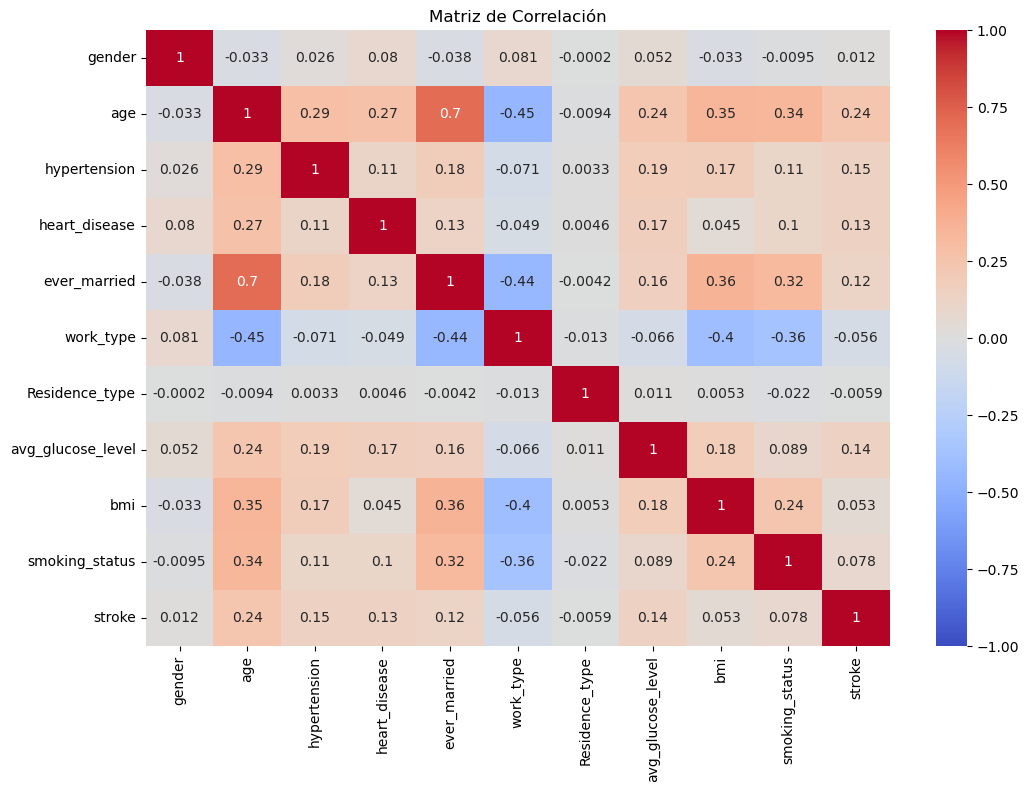

In [75]:
import seaborn as sns

matriz_correlacion = df_n.corr()
plt.figure(figsize=(12,8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [76]:
df_n.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.191030,1.089533,-0.313950,4.401325,0.770409,-0.661656,-0.989423,2.813279,0.998935,0.840866,4.757688
2,1.191030,1.649578,-0.313950,4.401325,0.770409,-0.661656,1.010454,0.020855,0.483539,-0.135013,4.757688
3,-0.837798,0.314086,-0.313950,-0.227151,0.770409,-0.661656,-0.989423,1.506342,0.722381,1.816745,4.757688
4,-0.837798,1.606497,3.184471,-0.227151,0.770409,0.635287,1.010454,1.572076,-0.584965,-0.135013,4.757688
5,1.191030,1.692658,-0.313950,-0.227151,0.770409,-0.661656,-0.989423,1.847065,0.043567,0.840866,4.757688


In [80]:
import pandas as pd
# cargar datos
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Extraer variables de entrada (todas las filas, todas las columnas menos la última)
# Nota que deberíamos hacer algún escalado lineal aquí
X = df_n[['age', 'bmi', 'smoking_status', 'hypertension']].values
Y = df_n['stroke'].values
Y = Y.astype(int) #Conversion salida a int

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3, ),
                   activation='relu',
                   max_iter=100_000,
                   learning_rate_init=.05)

nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
print(nn.coefs_)
print(nn.intercepts_)

print("Puntaje del conjunto de entrenamiento: %f" % nn.score(X_train, Y_train))
print("Puntaje del conjunto de prueba: %f" % nn.score(X_test, Y_test))

[array([[-0.88574116, -0.36793147, -0.73033547],
       [-0.26416539, -0.83935833,  0.16578912],
       [-0.05058435,  0.74919401, -0.38376609],
       [-0.04032426,  0.18343035, -1.12705843]]), array([[-1.25636329],
       [-0.18542516],
       [-1.26349576]])]
[array([ 1.42703025, -0.57170249,  0.7648315 ]), array([-1.40297131])]
Puntaje del conjunto de entrenamiento: 0.956171
Puntaje del conjunto de prueba: 0.960757
